<a href="https://colab.research.google.com/github/chaymaaaaa/go-my-code-/blob/main/data_processing_project%20visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv("/Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.dropna(inplace=True)
df.isnull().sum().sum()

0

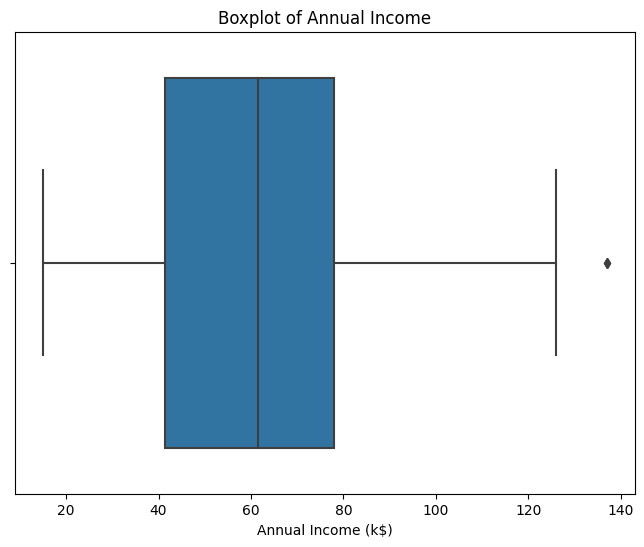

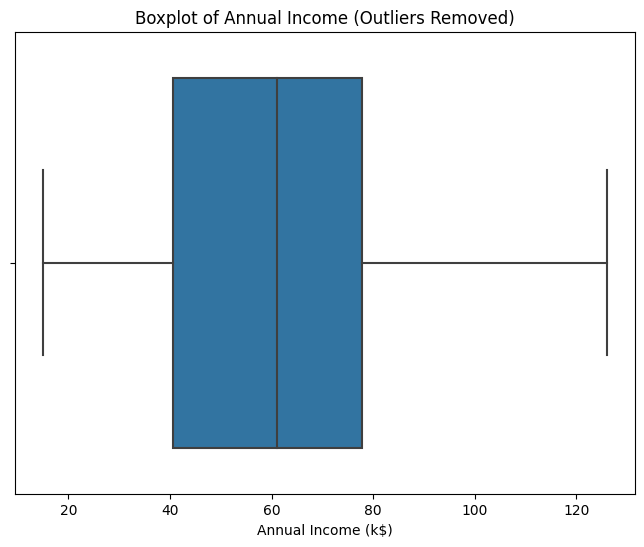


Cleaned DataFrame:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:

# Impute missing values in the 'Annual Income (k$)' column with the mean
df['Annual Income (k$)'].fillna(df['Annual Income (k$)'].mean(), inplace=True)

# Impute missing values in the 'Spending Score (1-100)' column with the mean
df['Spending Score (1-100)'].fillna(df['Spending Score (1-100)'].mean(), inplace=True)

# the outliers

# Visualize the distribution of 'Annual Income (k$)' to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Annual Income (k$)'])
plt.title("Boxplot of Annual Income")
plt.show()

# Identify outliers using the IQR method
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers in the 'Annual Income (k$)' column
df = df[(df['Annual Income (k$)'] >= lower_bound) & (df['Annual Income (k$)'] <= upper_bound)]

# Verify the removal of outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Annual Income (k$)'])
plt.title("Boxplot of Annual Income (Outliers Removed)")
plt.show()

# Display the cleaned DataFrame
print("\nCleaned DataFrame:\n", df.head())


In [5]:

# Feature engineering: Create a new feature 'Income per Age'
df['Income per Age'] = df['Annual Income (k$)'] / df['Age']
print("\nDataFrame after feature engineering:\n", df.head())

scaler = StandardScaler()
columns_to_standardize = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income per Age']
print("\nDataFrame after standardization:\n", df.head())



DataFrame after feature engineering:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Income per Age  
0        0.789474  
1        0.714286  
2        0.800000  
3        0.695652  
4        0.548387  

DataFrame after standardization:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                   

<ipython-input-6-3edc6616a140>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


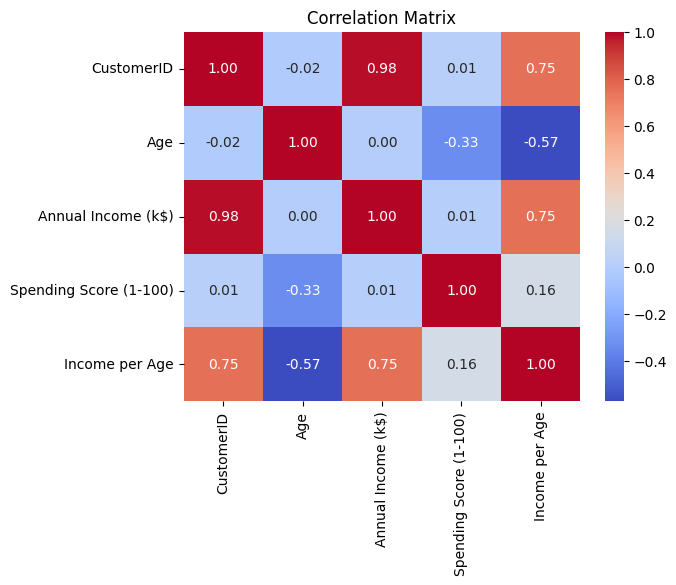

In [6]:
#  correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


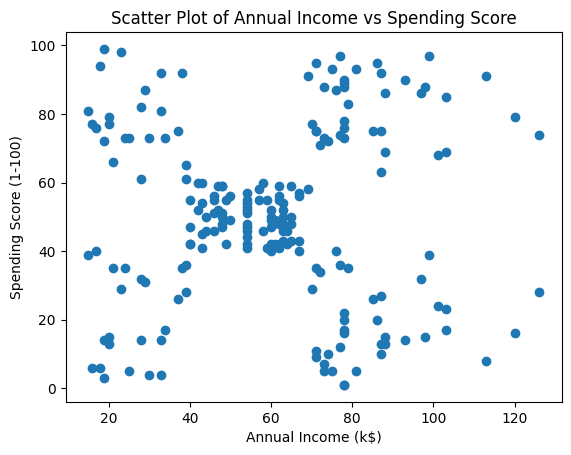

In [7]:
# Scatter plot of 'Annual Income' and 'Spending Score'
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.title("Scatter Plot of Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


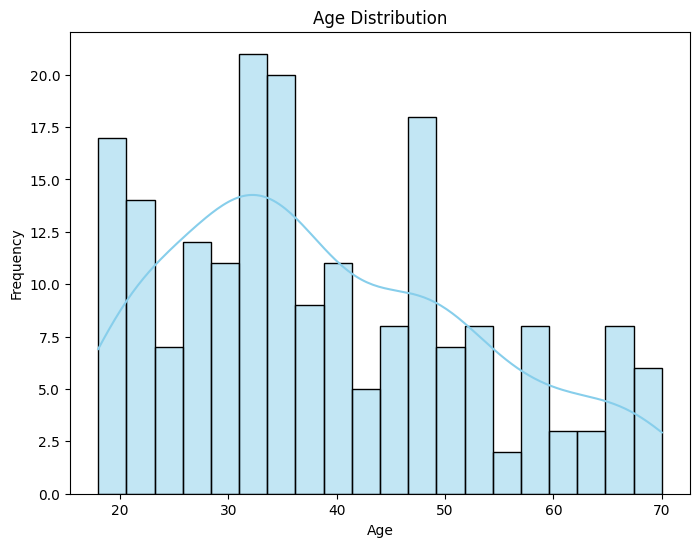

In [8]:

# Visualization 1: Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()




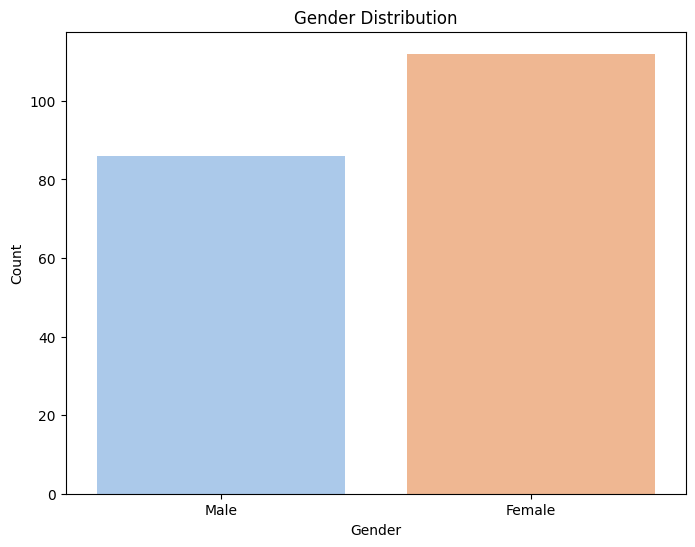

In [9]:
# Visualization 2: Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Gender'], palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


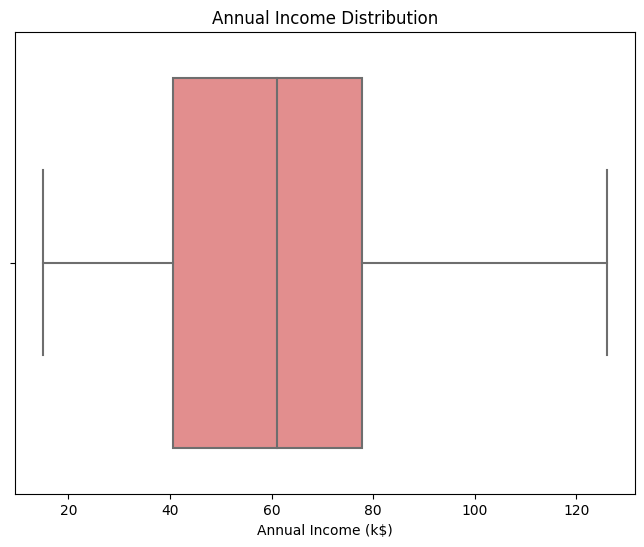

In [10]:
# Visualization 3: Annual Income Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Annual Income (k$)'], color='lightcoral')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.show()

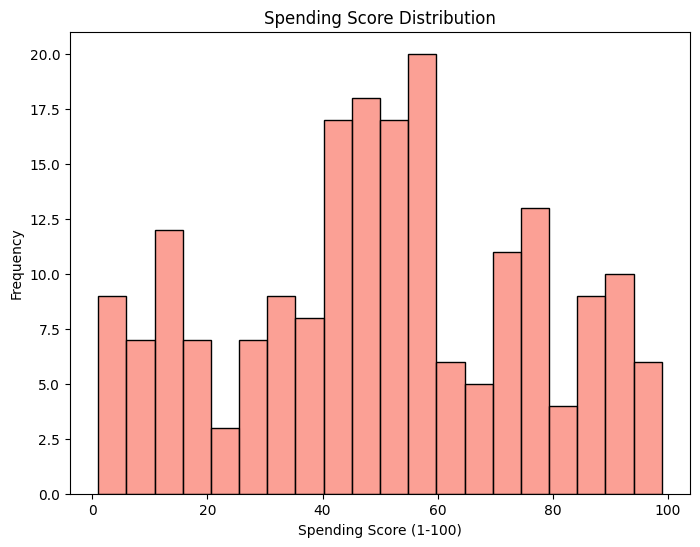

In [11]:
# Visualization 4: Spending Score Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Spending Score (1-100)'], bins=20, color='salmon')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()